# Visualization

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

seedval = 111111

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

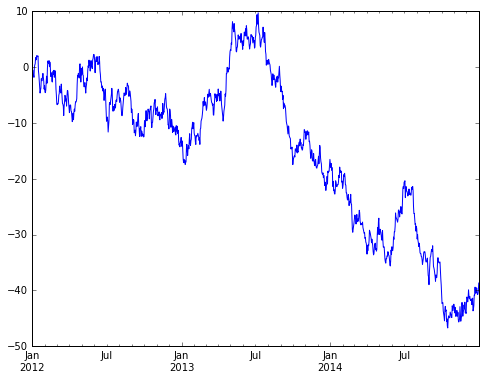

In [2]:
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096),
             index = pd.date_range('2012-01-01',
                                   '2014-12-31'))
walk_ts = s.cumsum()
walk_ts.plot()

In [3]:
#pd.options.display.mpl_style = 'default'
#walk_ts.plot() # did not work

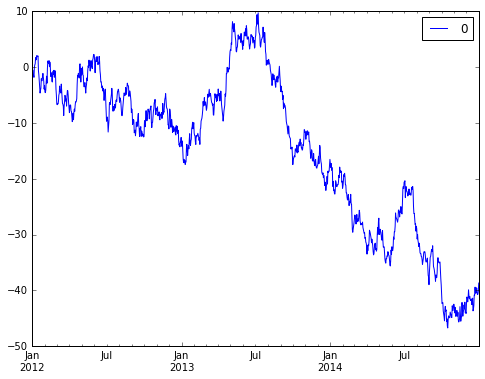

In [4]:
walk_df = pd.DataFrame(walk_ts)
walk_df.plot()

### Multicolumn DataFrame

In [5]:
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), 
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

,A,B
2012-01-01,-1.878324,1.362367
2012-01-02,-2.804186,1.427261
2012-01-03,-3.241758,3.165368
2012-01-04,-2.750550,3.332685
2012-01-05,-1.620667,2.930017


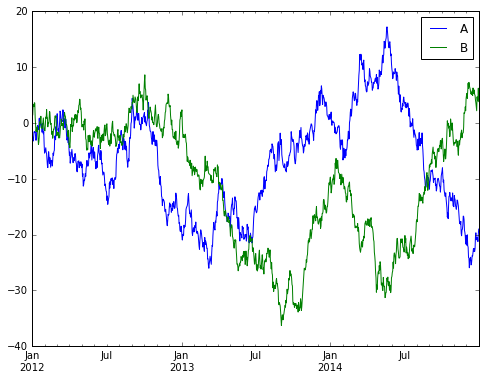

In [6]:
walk_df.plot()

### Use 1 column as X

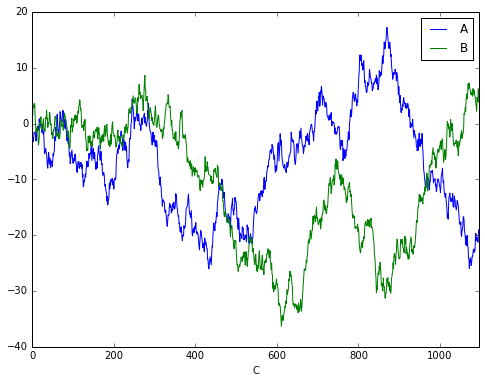

In [7]:
df2 = walk_df.copy()
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
df2.plot(x='C', y=['A', 'B'])

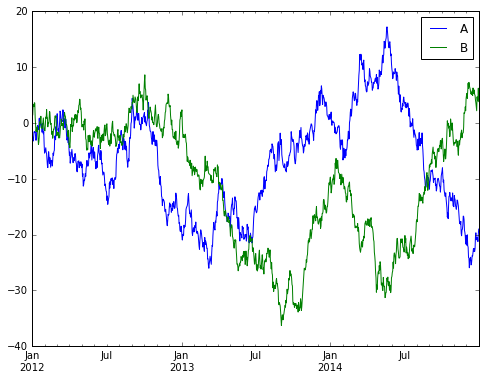

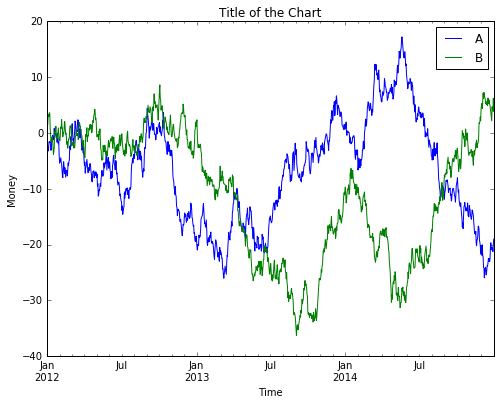

In [8]:
walk_df.plot()
walk_df.plot(title="Title of the Chart")
plt.xlabel('Time')
plt.ylabel('Money')

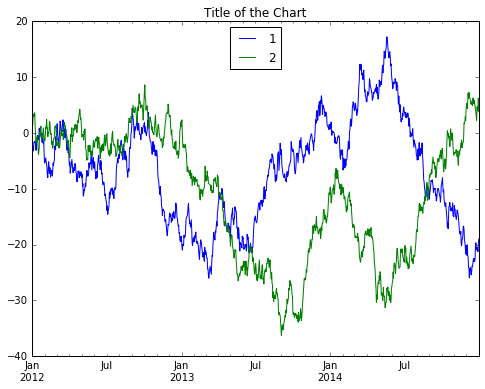

In [9]:
ax = walk_df.plot(title='Title of the Chart')
ax.legend(['1', '2'], loc='upper center')
# 0: best
# 1: UR
# 2: UL
# 3: LL
# 4: LR
# 5: R
# 6: CL
# 7: CR
# 8: LC
# 9: UC
# 10: C

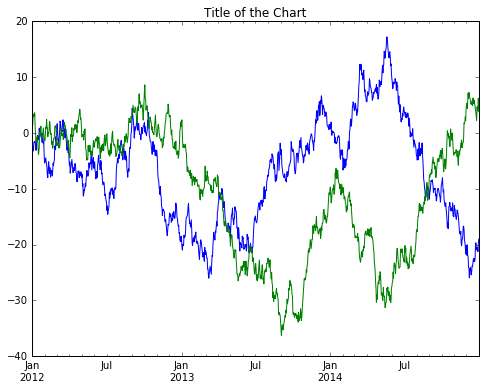

In [10]:
walk_df.plot(title='Title of the Chart', legend=False)

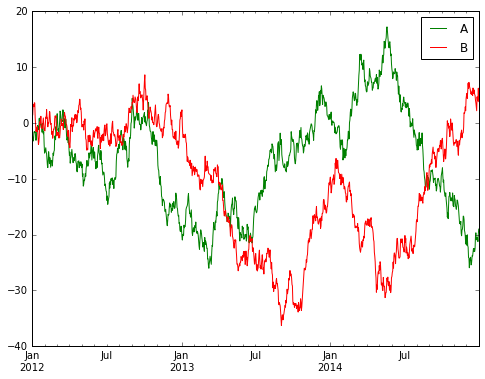

In [11]:
walk_df.plot(style=['g', '#FF0000'])
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# b: black
# w: white

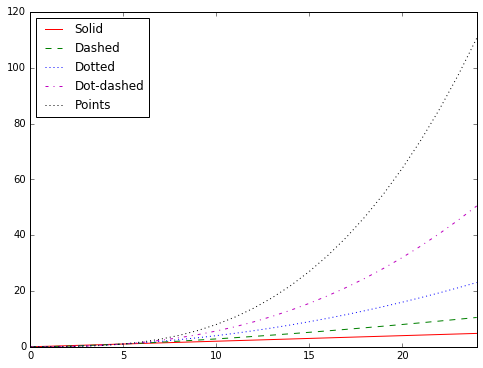

In [12]:
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 
                 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0: t,
                           1: t**1.5,
                           2: t**2.0,
                           3: t**2.5,
                           4: t**3.0})
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
ax.legend(legend_labels, loc='upper left')

# '-' : solid
# '--' : dashed
# ':' : dotted
# '-.' : dot-dashed
# '.' : points

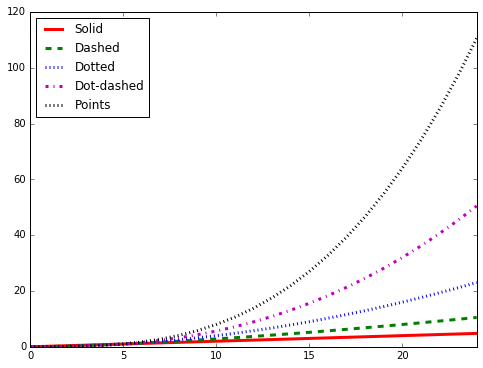

In [13]:
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left')

http://matplotlib.org/api/markers_api.html

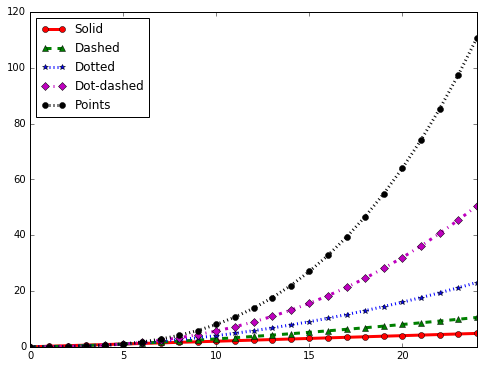

In [14]:
ax = line_style.plot(style=['r-o', 'g--^', 'b:*',
                            'm-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left')
# circles
# stars
# triangles
# diamonds
# points

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ])

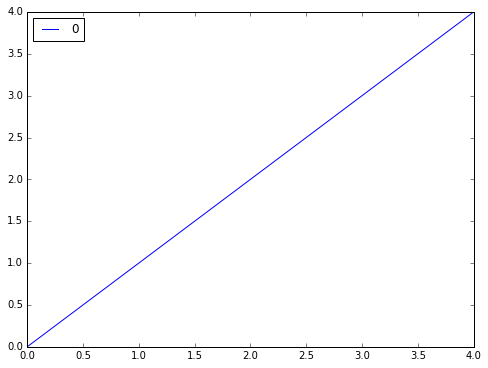

In [15]:
ticks_data = pd.DataFrame(np.arange(0, 5))
ticks_data.plot()
ticks, labels = plt.xticks()  # location of the ticks
ticks

([<matplotlib.axis.XTick at 0x11260ada0>,
 <a list of 7 Text xticklabel objects>)

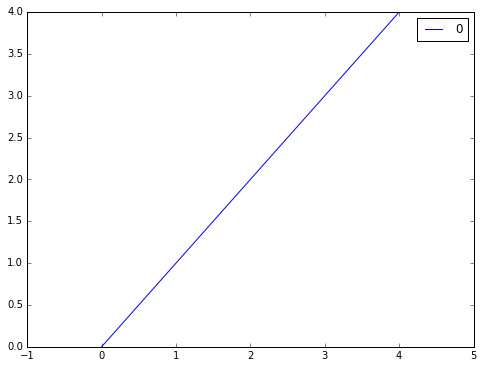

In [16]:
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6))

([<matplotlib.axis.YTick at 0x112781470>,
 <a list of 5 Text yticklabel objects>)

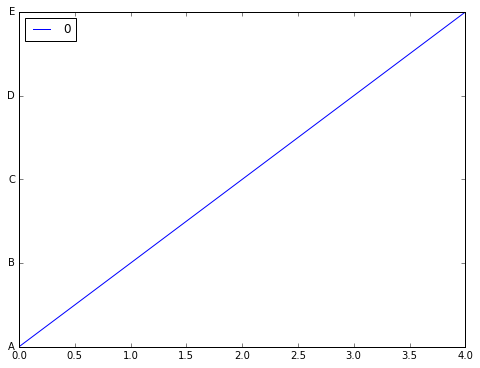

In [17]:
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0,5), list("ABCDE"))

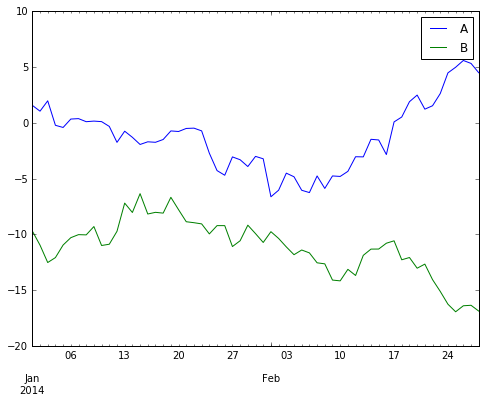

In [18]:
walk_df.loc['2014-01':'2014-02'].plot()

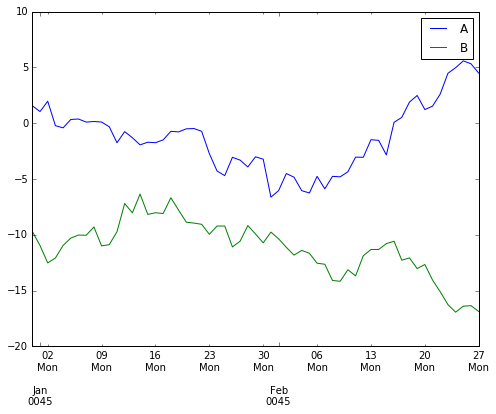

In [19]:
from matplotlib.dates import WeekdayLocator, \
DateFormatter, MonthLocator

ax = walk_df.loc['2014-01':'2014-02'].plot()

weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

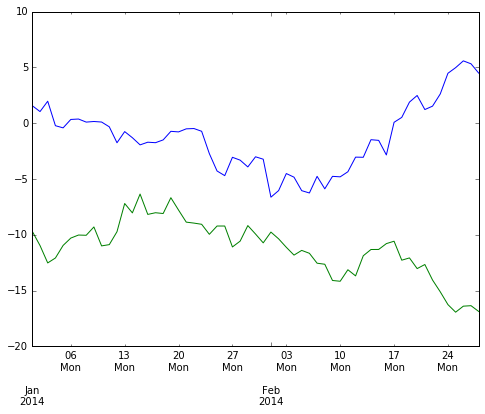

In [20]:
walk_subset = walk_df['2014-01':'2014-02']

fig, ax = plt.subplots()

ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))


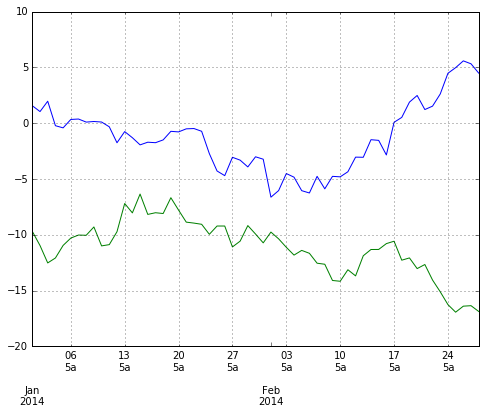

In [21]:
fig, ax = plt.subplots()

ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n5a'))
ax.xaxis.grid(True, 'minor') # turn off minor tick grid lines
ax.yaxis.grid(True, 'major') 

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

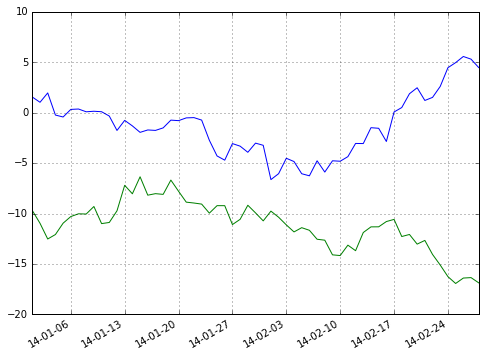

In [22]:
fig, ax = plt.subplots()

ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

ax.xaxis.grid(True, "major") # turn off major tick grid lines
ax.yaxis.grid(True, "major")


ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%y-%m-%d'))
                                           
fig.autofmt_xdate()                                  

# Common plots used in statistical analyses

### Bar plots

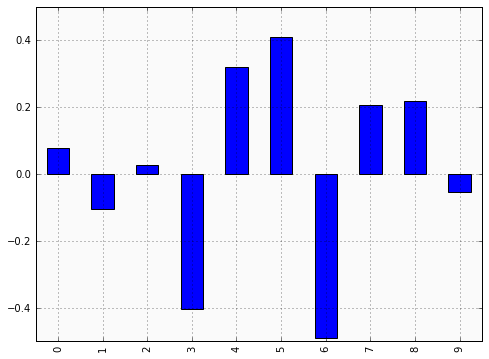

In [45]:
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)
ax2 = s.plot(kind='bar')

#added to match image
ax2.xaxis.grid(True)
ax2.yaxis.grid(True)
ax2.set_axis_bgcolor('#fafafa')

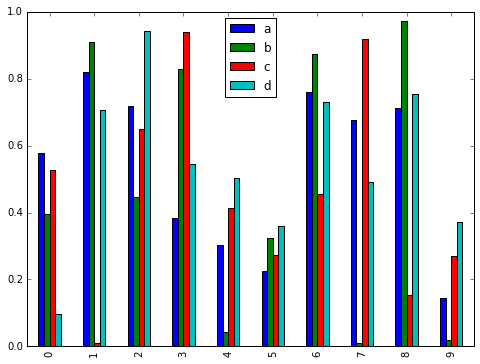

In [47]:
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4),
                   columns = ['a', 'b', 'c', 'd'])
df2.plot(kind='bar')

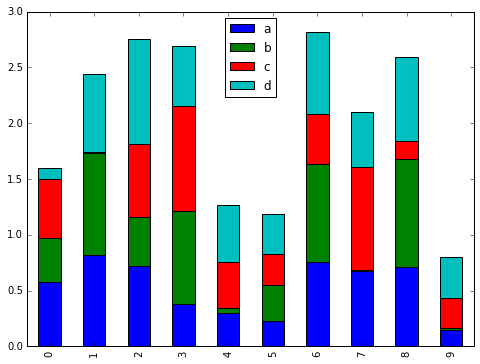

In [48]:
df2.plot(kind='bar', stacked=True)

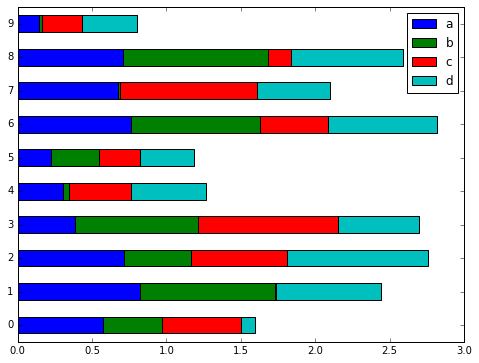

In [49]:
df2.plot(kind='barh', stacked=True)

### Histograms

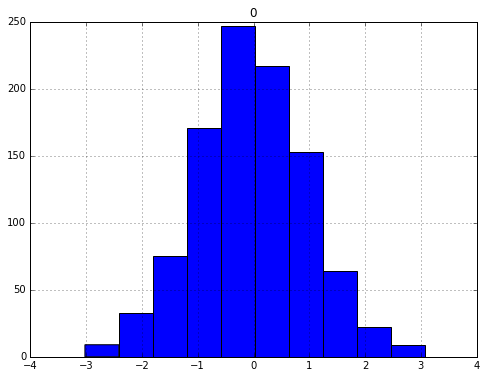

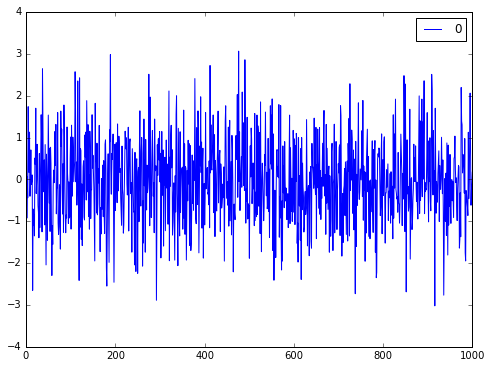

In [53]:
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000))
dfh.hist()
dfh.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1150fecf8>]], dtype=object)

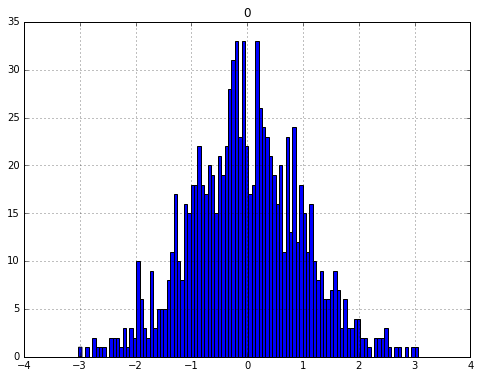

In [54]:
dfh.hist(bins=100)

,a,b,c,d
0,-1.878324,1.362367,-0.925862,0.064894
1,-0.437572,1.738107,0.491208,0.167316
2,1.129883,-0.402668,0.073876,0.704181
3,-0.122904,-0.053066,0.106313,-2.652280
4,-0.708080,-1.101806,-0.836509,-1.350070
...,...,...,...,...
995,0.533544,1.212515,0.276475,0.190150
996,-0.831434,0.230583,0.599695,1.908485
997,-2.561038,1.027329,-0.874943,0.596250
998,-0.547905,0.005701,0.399123,0.703238


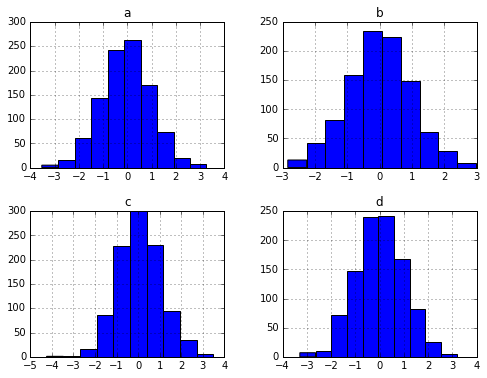

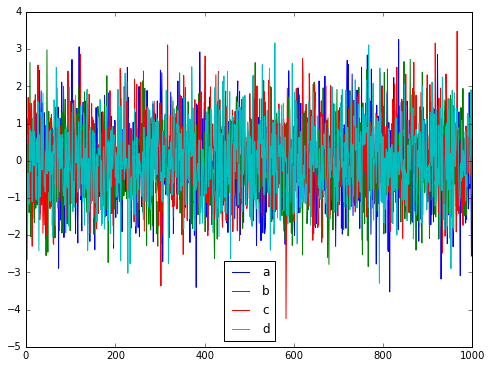

In [64]:
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4),
                   columns=['a', 'b', 'c', 'd'])
dfh.hist()
dfh.plot()
dfh

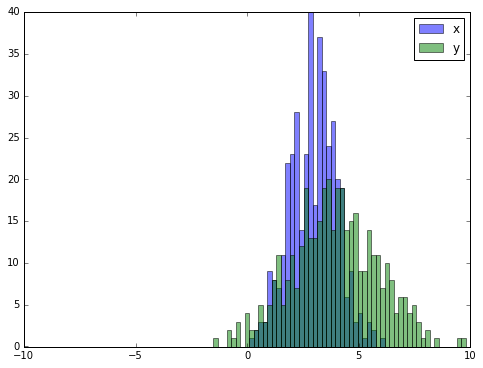

In [60]:
np.random.seed(seedval)
x = [np.random.normal(3, 1) for _ in range(400)]
y = [np.random.normal(4, 2) for _ in range(400)]

bins = np.linspace(-10, 10, 100)

plt.hist(x, bins, alpha=0.5, label='x')
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')

### Box and whisker charts

,0,1,2,3,4
0,-1.878324,1.362367,-0.925862,0.064894,-0.437572
1,1.738107,0.491208,0.167316,1.129883,-0.402668
2,0.073876,0.704181,-0.122904,-0.053066,0.106313
3,-2.652280,-0.708080,-1.101806,-0.836509,-1.350070
4,0.511343,0.355325,1.701553,-0.337359,-0.020597
5,0.839032,0.464744,-0.629987,-0.785945,-1.394383
6,0.620261,-1.152651,-0.103135,0.440016,1.544558
7,0.965943,-1.252908,2.642933,1.342999,-0.295199
8,-0.119870,0.465221,-1.086677,0.831922,-0.517407
9,-2.042879,0.602760,0.039995,-1.454979,-0.199571


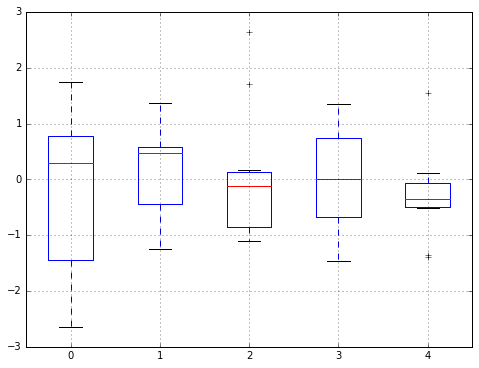

In [62]:
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10, 5))
dfb.boxplot(return_type = 'axes')
dfb

### Area plots

,a,b,c,d
0,0.576406,0.394657,0.528186,0.097860
1,0.820342,0.908433,0.009973,0.705332
2,0.717187,0.445323,0.650719,0.942483
3,0.382860,0.828695,0.938694,0.546024
4,0.302687,0.043013,0.414173,0.503440
5,0.226060,0.323951,0.273772,0.359828
6,0.758962,0.872668,0.454171,0.731148
7,0.677727,0.010610,0.919141,0.489711
8,0.710850,0.971763,0.154796,0.754658
9,0.143164,0.020395,0.270441,0.370609


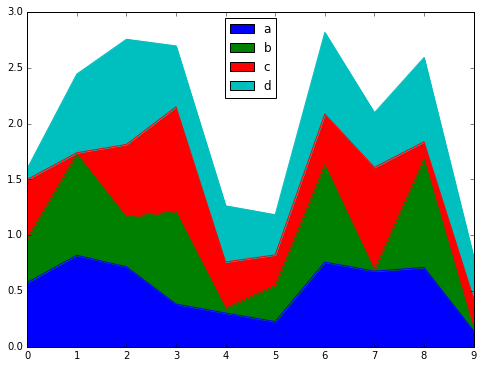

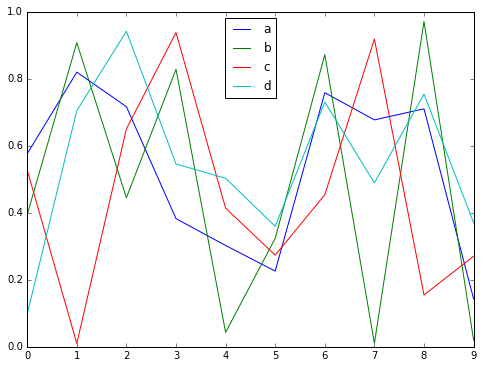

In [67]:
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4),
                   columns=['a', 'b', 'c', 'd'])
dfa.plot(kind='area')
dfa.plot()
dfa

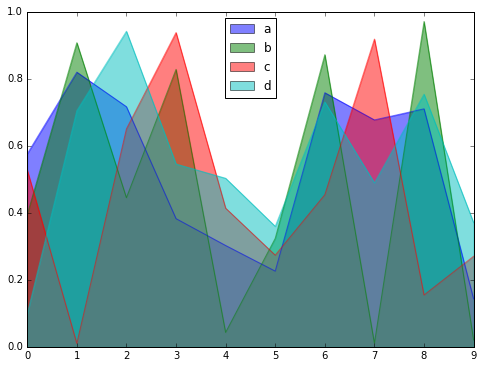

In [68]:
# Don't stack the area plot
dfa.plot(kind='area', stacked=False)

### Scatter plots

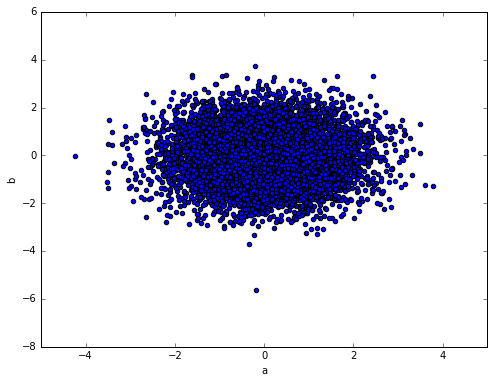

In [69]:
np.random.seed(111111)
sp_df = pd.DataFrame(np.random.randn(10000, 2),
                     columns=['a', 'b'])
sp_df.plot(kind='scatter', x='a', y='b')

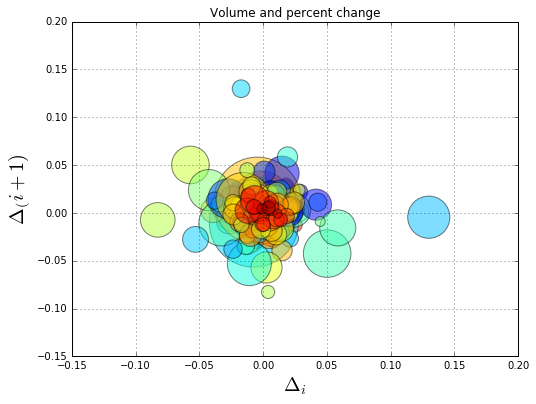

In [80]:
#from pandas.io.data import DataReader
from pandas_datareader.data import DataReader
stock_data = DataReader('GOOGL', 'yahoo',
                        datetime(2011, 1, 1),
                        datetime(2011, 12, 31))

delta = np.diff(stock_data["Adj Close"])/stock_data["Adj Close"][:-1]

volume = (15 * stock_data.Volume[:-2] / stock_data.Volume[0])**2
close = 0.003 * stock_data.Close[:-2] / 0.003 * stock_data.Open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta[:-1], delta[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_(i+1)$', fontsize=20)
ax.set_title('Volume and percent change')
ax.grid(True)

### Density Plot

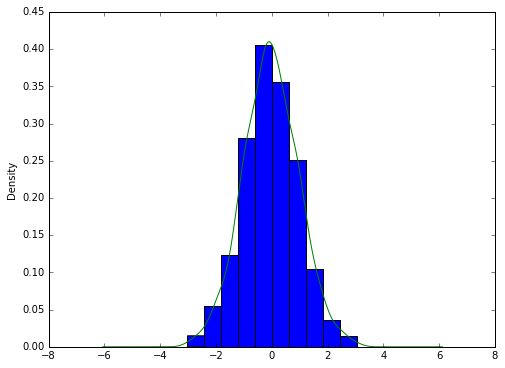

In [82]:
# kde: kernel density estimate
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
s.hist(normed=True)
s.plot(kind='kde')

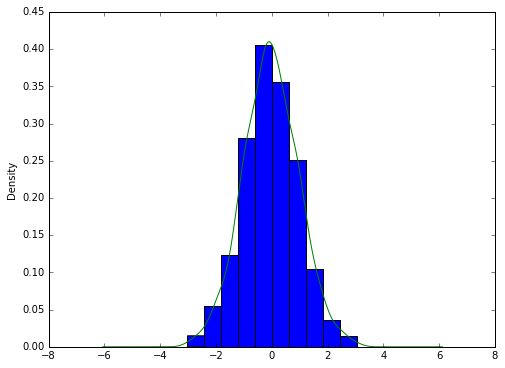

In [90]:
s.hist(normed=True)
s.plot(kind='kde')

### Scatter plot matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca19208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d259358>]], dtype=object)

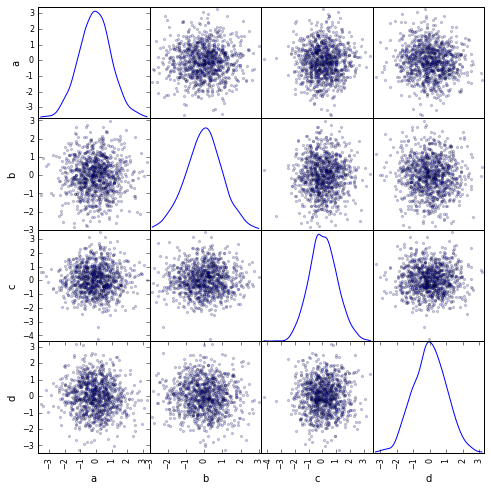

In [94]:
from pandas.tools.plotting import scatter_matrix

np.random.seed(111111)
df_spe = pd.DataFrame(np.random.randn(1000, 4), 
                      columns = ['a', 'b', 'c', 'd'])

scatter_matrix(df_spe, alpha=0.2, figsize=(8, 8), diagonal='kde')

### Heatmaps

In [97]:
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A': s + 0.0,
                             'B': s + 0.1,
                             'C': s + 0.2,
                             'D': s + 0.3,
                             'E': s + 0.4,
                             'F': s + 0.5,
                             'G': s + 0.6
                            })
heatmap_data

,A,B,C,D,E,F,G
V,0.0,0.1,0.2,0.3,0.4,0.5,0.6
W,0.1,0.2,0.3,0.4,0.5,0.6,0.7
X,0.2,0.3,0.4,0.5,0.6,0.7,0.8
Y,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Z,0.4,0.5,0.6,0.7,0.8,0.9,1.0


([<matplotlib.axis.YTick at 0x11d8e7ac8>,
 <a list of 5 Text yticklabel objects>)

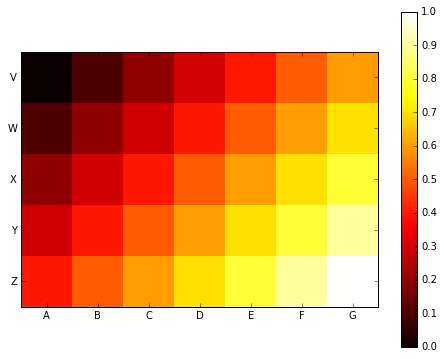

In [99]:
plt.imshow(heatmap_data, cmap="hot", interpolation='none')
plt.colorbar()

plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index)

# Multiple plots in a single chart

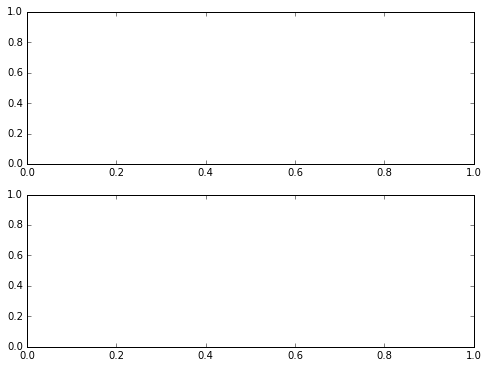

In [102]:
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0)) # 2 row, 1 colummn
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0)) # second row

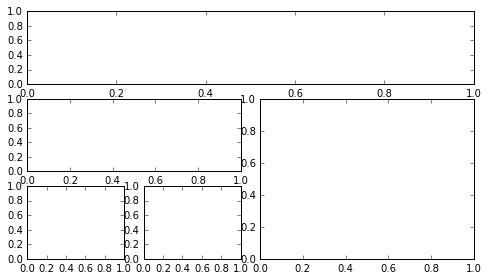

In [106]:
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)
ax2 = plt.subplot2grid((4,4), (1,0), colspan=2)
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((4,4), (2,0))
ax5 = plt.subplot2grid((4,4), (2,1))

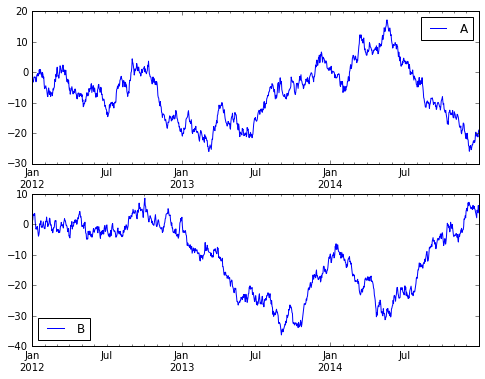

In [107]:
ax5 = plt.subplot2grid((2,1), (0,0))
ax6 = plt.subplot2grid((2,1), (1,0))
walk_df[[0]].plot(ax = ax5)
walk_df[[1]].plot(ax = ax6)

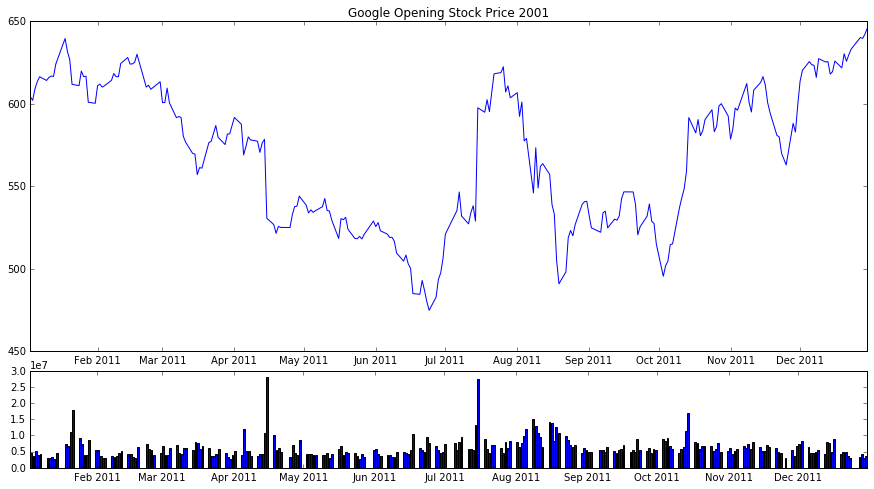

In [116]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(stock_data.index, stock_data['Close'], label='Close')
plt.title('Google Opening Stock Price 2001')

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(stock_data.index, stock_data['Volume'])
# plt.title('Google Trading Volumne')

plt.gcf().set_size_inches(15,8)